In [6]:
import os
from sklearn.preprocessing import StandardScaler
#import wfdb as wf
import numpy as np
import matplotlib.pyplot as plt
from biosppy.signals import ecg
import glob
from scipy import signal
import pandas as pd
from tensorflow.python.keras.layers import Dense, Convolution1D, Convolution2D,MaxPool1D, Flatten, Dropout
from tensorflow.python.keras.layers import Input
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers.normalization import BatchNormalization
import tensorflow.python.keras
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.python.keras.utils.np_utils import to_categorical
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from collections import Counter
from sklearn import preprocessing
import pandas as pd
import numpy as np
import os,glob
import math
import fnmatch
import re
import gc
import shutil
from joblib import Parallel, delayed
#import matplotlib.pyplot as plt
import scipy.signal as scipysi
import xgboost as xgb
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from sklearn.feature_selection import SelectFromModel
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, GRU
import shutil
#import matplotlib as plt
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Input, Dense, LSTM, multiply, concatenate, Activation, Masking, Reshape,CuDNNLSTM,GlobalMaxPooling1D, MaxPool2D,Flatten
from tensorflow.python.keras.layers import Conv1D, Conv2D, BatchNormalization, GlobalAveragePooling1D, Permute, Dropout, GlobalAveragePooling2D,Concatenate
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN, SVMSMOTE
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras import initializers
from tensorflow.keras import regularizers, constraints
import tensorflow.keras.backend as K


from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

from scipy import signal
from scipy.fft import fftshift

/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [7]:

output_path='/Users/aring/Desktop/ECG-identification/Arnold-data/nn-input-all'
model = tf.keras.models.load_model('/Users/aring/IdeaProjects/ECG-biometric/src/100k-data/identification-model-29-Jan-2021-14-11-08.h5')

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs_cnn (InputLayer)      (None, 12, 300, 1)        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 12, 300, 32)       832       
_________________________________________________________________
batch_normalization (BatchNo (None, 12, 300, 32)       128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 150, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 150, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 150, 64)        256       
_________________________________________________________________
max_

In [8]:
test_X_loaded=np.loadtxt(output_path+'/testX.csv', delimiter=',')
test_X_loaded=test_X_loaded.reshape(test_X_loaded.shape[0],12,300)
test_X_reshaped=test_X_loaded.reshape((-1, 12, 300, 1))

test_Y_loaded=np.loadtxt(output_path+'/testY.csv', delimiter=',')
test_Y_loaded=test_Y_loaded[:,0]


In [9]:

le = preprocessing.LabelEncoder()
le.fit(test_Y_loaded)
test_y_encoded = le.transform(test_Y_loaded)


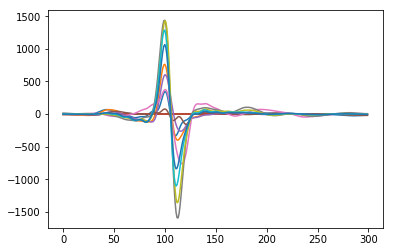

In [10]:
for i in range(0,11):
    plt.plot( test_X_reshaped[1900][i,:]) 

plt.show()

In [11]:
test_X_reshaped[1900][:,:,0].shape

(12, 300)

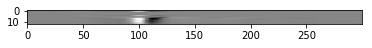

In [12]:
from matplotlib import pyplot
imgplot = pyplot.imshow(test_X_reshaped[1900][:,:,0], cmap='gray')


In [13]:
print(('Actual',test_Y_loaded[1900]))
prediction_proba=model.predict(test_X_reshaped[1900].reshape((-1, 12, 300, 1)))
y_pred=np.argmax(prediction_proba,axis=1)
print(('Prediction',y_pred))

('Actual', 1774.0)
('Prediction', array([1774]))


In [14]:
sub_model = Model(inputs=model.inputs, outputs=model.layers[1].output)
sub_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs_cnn (InputLayer)      (None, 12, 300, 1)        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 12, 300, 32)       832       
Total params: 832
Trainable params: 832
Non-trainable params: 0
_________________________________________________________________


In [15]:
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
import math

def show_feature_maps(full_model,layer_num,nrows,ncols,number_of_filters,input_vector):
    sub_model = Model(inputs=full_model.inputs, outputs=full_model.layers[layer_num].output)
    sub_model.summary()
    feature_maps = sub_model.predict(input_vector)
    #square = int (math.sqrt(num_of_filters))+1
    fig, axarr = plt.subplots(nrows=nrows, ncols=ncols)
    ix=1
    for row_no in range(nrows):
        if ix>number_of_filters:
            break
        for col_no in range(ncols):
            ax=axarr[row_no, col_no]
            ax.set_xticks([])
            ax.set_yticks([])
            ax.imshow(feature_maps[ 0,:, :, ix-1], interpolation='nearest', aspect='auto', cmap='gray')
            ix=ix+1
    pyplot.show()
    return feature_maps


    
    

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs_cnn (InputLayer)      (None, 12, 300, 1)        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 12, 300, 32)       832       
Total params: 832
Trainable params: 832
Non-trainable params: 0
_________________________________________________________________


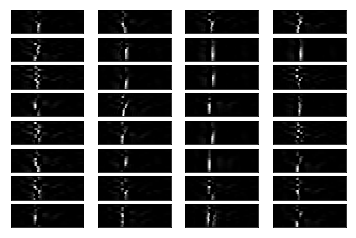

In [16]:
feature_maps=show_feature_maps(model,1,8,4,32,test_X_reshaped[1900].reshape((-1, 12, 300, 1)))

In [17]:
feature_maps.shape

(1, 12, 300, 32)

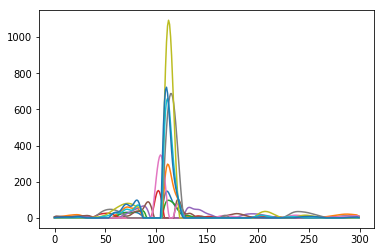

In [18]:
for i in range(0,11):
    plt.plot(feature_maps[ 0,i, :, 0]) 
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs_cnn (InputLayer)      (None, 12, 300, 1)        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 12, 300, 32)       832       
_________________________________________________________________
batch_normalization (BatchNo (None, 12, 300, 32)       128       
Total params: 960
Trainable params: 896
Non-trainable params: 64
_________________________________________________________________


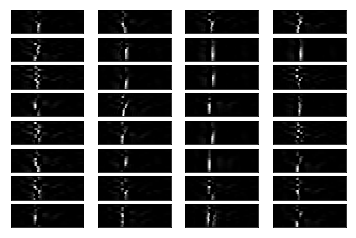

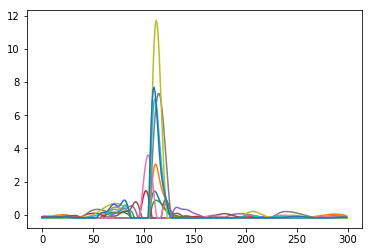

In [19]:
feature_maps=show_feature_maps(model,2,8,4,32,test_X_reshaped[1900].reshape((-1, 12, 300, 1)))
for i in range(0,11):
    plt.plot(feature_maps[ 0,i, :, 0]) 
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs_cnn (InputLayer)      (None, 12, 300, 1)        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 12, 300, 32)       832       
_________________________________________________________________
batch_normalization (BatchNo (None, 12, 300, 32)       128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 150, 32)        0         
Total params: 960
Trainable params: 896
Non-trainable params: 64
_________________________________________________________________


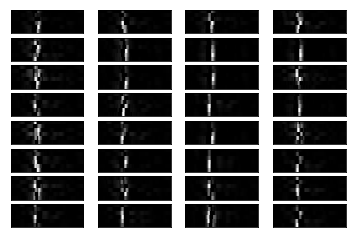

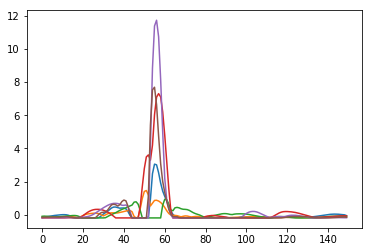

In [28]:
feature_maps=show_feature_maps(model,3,8,4,32,test_X_reshaped[1900].reshape((-1, 12, 300, 1)))
for i in range(0,6):
    plt.plot(feature_maps[ 0,i, :, 0]) 
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs_cnn (InputLayer)      (None, 12, 300, 1)        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 12, 300, 32)       832       
_________________________________________________________________
batch_normalization (BatchNo (None, 12, 300, 32)       128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 150, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 150, 64)        51264     
Total params: 52,224
Trainable params: 52,160
Non-trainable params: 64
_________________________________________________________________


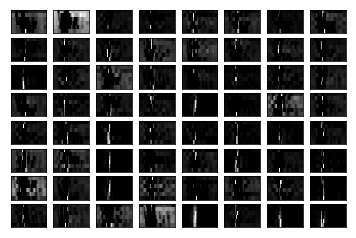

In [31]:
feature_maps=show_feature_maps(model,4,8,8,64,test_X_reshaped[1900].reshape((-1, 12, 300, 1)))


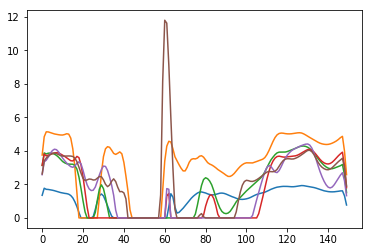

In [32]:
for i in range(0,6):
    plt.plot(feature_maps[ 0,i, :, 0]) 
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs_cnn (InputLayer)      (None, 12, 300, 1)        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 12, 300, 32)       832       
_________________________________________________________________
batch_normalization (BatchNo (None, 12, 300, 32)       128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 150, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 150, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 150, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 75, 64)         0         
__________

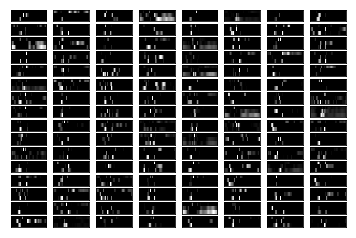

In [22]:
feature_maps=show_feature_maps(model,7,16,8,128,test_X_reshaped[1900].reshape((-1, 12, 300, 1)))

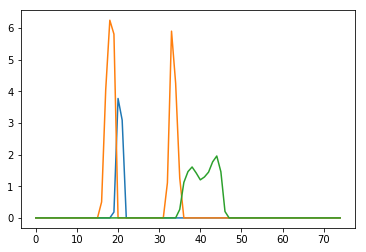

In [23]:
for i in range(0,3):
    plt.plot(feature_maps[ 0,i, :, 2]) 
plt.show()